# RECOMMENDATION SYSTEMS - PROJECT FOR PHONE USER REVIEW

In [6]:
import os
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
file1= pd.read_csv('phone_user_review_file_1.csv',encoding='latin1')
file2= pd.read_csv('phone_user_review_file_2.csv',encoding='latin1')
file3= pd.read_csv('phone_user_review_file_3.csv',encoding='latin1')
file4= pd.read_csv('phone_user_review_file_4.csv',encoding='latin1')
file5= pd.read_csv('phone_user_review_file_5.csv',encoding='latin1')
file6= pd.read_csv('phone_user_review_file_6.csv',encoding='latin1')
file1.shape
file2.shape



(114925, 11)

In [8]:
file1.shape


(374910, 11)

In [9]:
file2.shape

(114925, 11)

In [10]:
file3.shape

(312961, 11)

In [11]:
file4.shape

(98284, 11)

In [12]:
file5.shape

(350216, 11)

In [13]:
file6.shape

(163837, 11)

In [14]:
data_comb=pd.concat([file1, file2,file3,file4,file5,file6])

In [15]:
data_comb.shape

(1415133, 11)

In [16]:
data_comb.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


In [17]:
# ROund off scores to the nearest integers in the dataframe
data_comb['score'].round(decimals=0)

0         10.0
1         10.0
2          6.0
3          9.0
4          4.0
          ... 
163832     2.0
163833    10.0
163834     2.0
163835     8.0
163836     2.0
Name: score, Length: 1415133, dtype: float64

In [18]:
# Check for missing values. Impute the missing values if there is any ?
#data_comb.isnull().sum()

In [19]:
#data_comb.profile_report()

In [20]:
# As can be seen from above there are missing values in the data set and theserows can be straight away dropped 
# as they amount to only 63689 values and do not account for a significant portion in the data

#rows_with_nan = []
#for index, row in data_comb.iterrows():
#    is_nan_series = row.isnull()
#    if is_nan_series.any():
#        rows_with_nan.append(index)

#print(rows_with_nan)

In [21]:
data_comb1=data_comb.dropna()

In [22]:
data_comb.shape

(1415133, 11)

In [23]:
data_comb1.shape

(1275917, 11)

In [24]:
# So as we can see we have now dropped the rows with missing values now let us check 
# for duplicate values based on the column of extracts which means the same comments
# given by the user.

data_comb1.drop_duplicates(subset="extract", keep=False, inplace= True)

<ipython-input-24-4d82feb150e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_comb1.drop_duplicates(subset="extract", keep=False, inplace= True)


In [25]:
# keeping only 10,00,000 rows using a random state = 612
data_comb1=data_comb1.sample(n=1000000, random_state=612)
data_comb1.shape

(1000000, 11)

In [26]:
data_comb1.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
53826,/cellphones/apple-iphone-5s/,1/15/2014,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,9.3,10.0,ÐÐ¾Ð¼Ñ Ð½ÑÐ¶ÐµÐ½ Ñ Ð¾ÑÐ¾ÑÐ¸Ð¹ ÑÐµÐ»ÐµÑÐ...,ÐÐµÑÐ°,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹)
46660,/cellphones/samsung-galaxy-note-3-neo-4g-n7505/,5/31/2015,fr,fr,Amazon,amazon.fr,10.0,10.0,"Pochette samsung comme dÃ©crit au dessus , la ...",chevy,Samsung N750x Etui Ã rabat pour Samsung Samsu...
28602,/cellphones/nokia-n73/,2/3/2009,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½Ð¾Ð¼ Ð¿Ð¾Ð»ÑÐ·ÑÑÑÑ Ð´Ð¾Ñ...,senyapan4aneliy,Nokia N73
53415,/cellphones/htc-one-x/,30/7/2012,en,us,Amazon,amazon.com,10.0,10.0,A beautiful phone.. Fast! Better than Iphone! ...,Michael,HTC One X 32 GB White Android SmartPhone with ...
325220,/cellphones/sony-ericsson-k800i/,2/16/2008,en,gb,Amazon,amazon.co.uk,10.0,10.0,Very happy with product and quick deluvery.,dianemclaughlin,"Sony Ericsson K800i 2"" 115g Black - mobile pho..."
283251,/cellphones/lg-optimus-f5/,12/10/2013,en,au,eBay,ebay.com.au,8.0,10.0,"great product for the price,but ebay do not ma...",gums2830,LG Optimus F5 P875 - 8GB - White Smartphone
25553,/cellphones/motorola-moto-e/,9/29/2014,pt,br,Submarino,submarino.com.br,10.0,10.0,"Ãtimo smartphone, rÃ¡pido, navega muito bem, ...",Roberto Peratelli,Motorola Smartphone Motorola Moto E DTV Colors...
164447,/cellphones/htc-one-m7/,10/18/2014,ru,ru,Yandex,market.yandex.ru,6.0,10.0,ÐÐ»Ñ Ð°ÐºÑÐ¸Ð²Ð½ÑÑ Ð¿Ð¾Ð»ÑÐ·Ð¾Ð²Ð°ÑÐµÐ»...,dixi56,HTC One Dual Sim
339007,/cellphones/sony-ericsson-k530i/,5/18/2009,fr,fr,GraphMobile,graphmobile.com,7.0,10.0,Bin je veux acheter un sony ericsson mais j'hÃ...,Djazia,Sony-Ericsson K530i
202286,/cellphones/samsung-i9500-galaxy-s-iv/,7/13/2013,en,us,Amazon,amazon.com,10.0,10.0,This phone is by far one of the best ones I ha...,Amazon Customer,"Samsung Galaxy S4, Black Mist 32GB (AT&T)"


In [27]:
# As can be seen here, the following parameters are not essential in the dataset
# and can be dropped without any effect on building the recommender system
# 1.) Phone URL - Since this is merely the link to buy the phone
# 2.) Date- Unless we are trying to recommend the latestmodels this column can also be dropped
# 3.) Lang- Language of of the extract does not matter
# 4.) domain- Since we know the source , the domain of the website does not really matter
# 5.) score_max- ALl the scores are given with respect to the max score of 10
# 6.) Extract - This involves the comments of the users and as can be seen above 
# against row 94811 , the extract contains onle a bunch of ??? and this column
# can also be dropped

In [28]:
data_comb1=data_comb1.drop(['phone_url','date','lang','domain','score_max','extract'],axis=1)


In [29]:
#data_comb1=data_comb1.drop(['lang','domain','score_max','extract'],axis=1)

In [30]:

data_comb1.shape

(1000000, 5)

In [31]:
data_comb1.head(10)

,country,source,score,author,product
53826,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,9.3,ÐÐµÑÐ°,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹)
46660,fr,Amazon,10.0,chevy,Samsung N750x Etui Ã rabat pour Samsung Samsu...
28602,ru,Yandex,8.0,senyapan4aneliy,Nokia N73
53415,us,Amazon,10.0,Michael,HTC One X 32 GB White Android SmartPhone with ...
325220,gb,Amazon,10.0,dianemclaughlin,"Sony Ericsson K800i 2"" 115g Black - mobile pho..."
283251,au,eBay,8.0,gums2830,LG Optimus F5 P875 - 8GB - White Smartphone
25553,br,Submarino,10.0,Roberto Peratelli,Motorola Smartphone Motorola Moto E DTV Colors...
164447,ru,Yandex,6.0,dixi56,HTC One Dual Sim
339007,fr,GraphMobile,7.0,Djazia,Sony-Ericsson K530i
202286,us,Amazon,10.0,Amazon Customer,"Samsung Galaxy S4, Black Mist 32GB (AT&T)"


The following points are addressed in this section:
1.) Identify the most rated features- Not clear as to what the expectation is here
2.) Identify the users with most number of reviews
3.) Select the data with products having more than 50 ratings and users who have give more than 50 ratings. Report the final shape of the dataset

In [32]:
#Identify the users with most number of reviews
#data_comb1_author = data_comb1.groupby(['author'])
n = data_comb1.author.nunique()
print(n)

639641


In [33]:

no_of_rated_products_per_user = data_comb1.groupby(by='author')['score'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head(10)

author
Amazon Customer    62240
Cliente Amazon     16313
Client d'Amazon     6485
e-bit               5781
Amazon Kunde        3974
einer Kundin        2142
Anonymous           2118
einem Kunden        1556
unknown             1388
Anonymous           1145
Name: score, dtype: int64

In [34]:
# Getting a list of the products that have more than 50 ratings
Products_50_rating=data_comb1.groupby('product')['score'].count().sort_values(ascending=False).head(4500)

In [35]:
Products_50_rating.head(4500)

product
Lenovo Vibe K4 Note (White,16GB)                                                                                          4269
Lenovo Vibe K4 Note (Black, 16GB)                                                                                         3547
OnePlus 3 (Graphite, 64 GB)                                                                                               3374
OnePlus 3 (Soft Gold, 64 GB)                                                                                              2898
Lenovo Vibe K5 (Gold, VoLTE update)                                                                                       1992
                                                                                                                          ... 
Motorola RAZR V3 Unlocked Phone with Camera and Video Player--U.S. Version with Warranty (Pink)                             51
Microsoft Nokia Lumia 710 Smartphone (9,4 cm (3,7 Zoll) Touchscreen, 5 Megapixel Kamera, Windows Phone 

In [36]:
# Getting a list of the users that have given more than 50 ratings
Users_50_rating=data_comb1.groupby('author')['score'].count().sort_values(ascending=False).head(600)

In [37]:
Users_50_rating.head(600)

author
Amazon Customer                         62240
Cliente Amazon                          16313
Client d'Amazon                          6485
e-bit                                    5781
Amazon Kunde                             3974
                                        ...  
Johannes                                   51
Laurent                                    51
B                                          50
Autor si pÅÃ¡l zÅ¯stat v anonymitÄ       50
Heather                                    50
Name: score, Length: 600, dtype: int64

In [38]:
data_comb1.groupby('product')['score'].mean().sort_values(ascending=False).head(10)

product
æ©æç½æ C168i                                                                                                                         10.0
Nokia Sony Ericsson W580i Pink On T-Mobile PAYG Mobile Phone                                                                               10.0
Nokia Sony Ericsson K770i Pink On Vodafone PAYG Mobile Phone                                                                               10.0
Nokia Smartphone Nokia Lumia 930 Desbloqueado Branco Sistema Operacional Windows 8.1 ConexÃ£o 4G CÃ¢mera 20 MP MemÃ³ria Interna de 32GB    10.0
Nokia Smartphone Nokia Lumia 830 Desbloqueado Windows 8.1 Tela 5 MemÃ³ria Interna 16GB Wi-Fi CÃ¢mera 10MP GPS Preto                        10.0
Nokia Smartphone Nokia Lumia 830 Desbloqueado Windows 8.1 Tela 5 MemÃ³ria Interna 16GB Wi-Fi CÃ¢mera 10MP - Branco                         10.0
Nokia Smartphone Nokia Lumia 730 Dual Chip Desbloqueado Windows 8.1 Tela 4.7 MemÃ³ria Interna 8GB Wi-Fi CÃ¢mera 6.7MP GPS - Pret

In [39]:
data_comb1.groupby('product')['score'].count().sort_values(ascending=False).head(10)

product
Lenovo Vibe K4 Note (White,16GB)                4269
Lenovo Vibe K4 Note (Black, 16GB)               3547
OnePlus 3 (Graphite, 64 GB)                     3374
OnePlus 3 (Soft Gold, 64 GB)                    2898
Lenovo Vibe K5 (Gold, VoLTE update)             1992
Lenovo Vibe K5 (Grey, VoLTE update)             1674
Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)    1620
Samsung Galaxy S7 edge 32GB (Verizon)           1546
OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)    1538
Samsung Galaxy S7 edge 32GB (T-Mobile)          1480
Name: score, dtype: int64

We have seen the products rated purely based on the rating score above and also the products based on the number fo reviews as shown above. Now let us try to combine both and see what recommendations come up.

In [40]:
Data_Mobile_Rating=pd.DataFrame(data_comb1.groupby('product')['score'].mean())

In [41]:
Data_Mobile_Rating['Score_Counts']=pd.DataFrame(data_comb1.groupby('product')['score'].count())

In [42]:
Data_Mobile_Rating.head(5)

,score,Score_Counts
product,,
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000,1
"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;blanc)-Smartphone",6.000000,1
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.000000,1
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",7.657143,35
*** A&D COFFRET OFFICIEL WIKO **** Housse WIKO CINK FIVE Coque wiko cink five protection Flip cover Etui ORIGINAL...,6.666667,3


AS WE CAN SEE CLEARLY THE POPULARITY RECOMMENDATION BASED SYSTEM PURELY RANKS THE PRODUCTS BASED ON THE RATING AND IS NOT PRESONALLIZED IN ANY SENSE AND ALSO DOES NOT TAKE IN TO CONSIDERATION THE NUMBER OF PEOPLE WHO RANKED THAT PARTICULAR MOVIE WHICH IS SORT OF THE MAJOR DRAWBACK IN THIS SYSTEM

USER USER COLLABORATIVE FILTERING

In [43]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import dataset

In [44]:
#Split the dataset in to training and testing dataset
# 80% traininng and 20% testing set

In [45]:
data_comb2=data_comb1.sample(n=60000, random_state=612)

In [46]:
# You'll need to create a dummy reader
reader = Reader(line_format='user item rating', rating_scale=(1, 10))

# Also, a dummy Dataset class
class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['author'], df['product'], df['score'])]
        self.reader=reader

data = MyDataset(data_comb2, reader)

In [47]:
data

In [48]:
trainset,testset=train_test_split(data,test_size=0.15)

In [49]:
# Create a modelfor user user CVD
algo = KNNWithMeans(k=70, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [50]:
# Run the trained model against the testset
test_pred=algo.test(testset)
test_pred_user = pd.DataFrame(test_pred)

In [51]:
test_pred_user.head()

,uid,iid,r_ui,est,details
0,Glasklar,Microsoft Nokia Lumia 630 Single-SIM Smartphon...,10.0,7.949343,"{'was_impossible': True, 'reason': 'User and/o..."
1,GALLOHORACIO,Motorola A1200i,8.0,7.949343,"{'was_impossible': True, 'reason': 'User and/o..."
2,L1970,Sagem my600V,2.0,7.949343,"{'was_impossible': True, 'reason': 'User and/o..."
3,ÐÐ½Ð´ÑÐµÐ¹,Samsung C3350 Xcover2 (Gray),2.0,7.949343,"{'was_impossible': True, 'reason': 'User and/o..."
4,Expert Review,Apple iPhone 5S 16GB White,6.0,7.949343,"{'was_impossible': True, 'reason': 'User and/o..."


In [52]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 2.7352


2.7351588560987077

In [53]:
# Top 5 models based on User - User Rating
c=test_pred_user.groupby('iid')['est'].mean().sort_values(ascending=False)
c.head(5)


iid
Blackview [Lacaca Store VenerdÃ¬ Nero] Blackview BV6000S 4G IP68 Smartphone Impermeabile 4,7 inch Android 6.0 Quad-Core 3 Antiurto Resistente Alla Polvere 2GB Di RAM 16GB GPS NFC OTG + GLONASS (Blake-1)    10.0
Samsung B2100 Solid Extreme Sim Free Mobile Phone - Black                                                                                                                                                     10.0
Samsung Galaxy J5 - Smartphone de 5" (1280 x 720 pixeles, TFT, 1,2 GHz, memoria interna de 8 GB, 4G), blanco                                                                                                  10.0
Motorola XT1068 Moto G (2ND GENERATION - 2014) DUAL SIM 8GB Factory Unlocked 3G Phone - Black (International Version - No Warranty)                                                                           10.0
Sony Xperia U Noir                                                                                                                                      

In [54]:
# Fitting an Item Item based model
algo_item = KNNWithMeans(k=70, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_item.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [55]:
#Predicting the test class using Item-Item collaborative filtering
test_pred_item=algo_item.test(testset)


In [56]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

Item-based Model : Test Set
RMSE: 2.6944


2.6943514471851255

In [57]:
# Top 5 models based on Item - Item Rating
test_pred_item = pd.DataFrame(test_pred_item)
d=test_pred_item.groupby('iid')['est'].mean().sort_values(ascending=False)
d.head(5)

iid
LG Nexus 5x - Smartphone de 5.2" (WiFi, DLNA, procesador Qualcomm Snapdragon 808 de 64 bits y 6 nÃºcleos, memoria interna de 32 GB, memoria RAM 2 GB, Android Marshmallow) color blanco    10.0
Nokia Lumia 920 32GB 4G Giallo                                                                                                                                                             10.0
BLU Vivo Air Unlocked Cellphone, 16GB, Black                                                                                                                                               10.0
Sony Xperia Z5 Premium E6853 5.5-Inch 4K UHD Display Factory Unlocked (BLACK) - International Stock No Warranty                                                                            10.0
Alcatel One Touch Idol 3 Smartphone, 4.7", Dual SIM, Grigio Scuro [Italia]                                                                                                                 10.0
Name: est, dtype: float64

Findings and Inferences:<br>
As can be seen clearly the RMSE values for both user-user collaborative filter model and item-item collaborative filter model are quite high with 2.75 and 2.69 respectively.<br>
The RMSE value is a function of the spread of the data which means higher the Standard deviation, higher will be RMSE value and also is a function of the number of samples used to compute the RMSE value. So IF we WERE TO INCREASE THE NUMBER OF SAMPLES THE RMSE WILL GO DOWN AND LIKE WISE IF WE REDUCE THE SD OF THE DATA THE RMSE WILL GO DOWN.

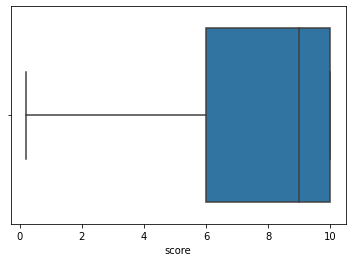

In [58]:
sns.boxplot(data=data_comb2,x=data_comb2["score"])

score
9.0
4.0


,country,source,score,author,product
21631,de,Otto.de,10.0,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,..."
13541,us,Samsung,9.2,BluAngel,Samsung Galaxy S7 edge 32GB (AT&T)
72826,es,Amazon,8.0,RoCaDiSea,LG Nexus 5 - Smartphone libre Android (pantall...
299112,de,Amazon,8.0,Pelczer,"Doogee X7 Pro Smartphone 6,0 Zoll HD Bildschir..."
307955,es,Ciao,6.0,Garofalo,Palm Pre


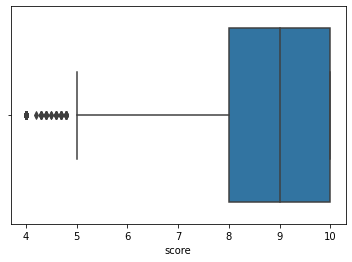

In [59]:
# lET US FIND THE OUTLIERS AND REPLACE THEM WITH THE MEDIAN
k=['score']
for i in k:
   m=data_comb2[i].quantile(0.50)
   print(i)
   print(m) 
   o=data_comb2[i].quantile(0.15)
   print(o)
   data_comb2[i]=np.where(data_comb2[i]<o,m,data_comb2[i]) 
data_comb2.isnull().sum()
sns.boxplot(data=data_comb2,x=data_comb2["score"])
data_comb2.head()

In [60]:
# You'll need to create a dummy reader
reader = Reader(line_format='user item rating', rating_scale=(1, 10))

# Also, a dummy Dataset class
class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['author'], df['product'], df['score'])]
        self.reader=reader

data = MyDataset(data_comb2, reader)

In [61]:
trainset_NO,testset_NO=train_test_split(data,test_size=0.15)

In [62]:
# Create a modelfor user user CVD
algo = KNNWithMeans(k=70, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset_NO)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [63]:
# Run the trained model against the testset
test_pred_NO=algo.test(testset_NO)
test_pred_user_NO = pd.DataFrame(test_pred_NO)

In [64]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_NO, verbose=True)

User-based Model : Test Set
RMSE: 1.7397


1.7396738847377808

# AS CAN BE SEENS ABOVE , WHAT has been DONE  is that the Standard deviation of the data has been reduced even though it means there are some  outliers in the data, and it is seen that the RMSE decreases siginificantly from around 2.7 to 1.76.

# In what business scenario you should use popularity based Recommendation Systems ?

Popularity based recommendation system does not take in to account any personal preferences and simply recommends the top rated products based on scores/ratings. This may be used in scenarios as a first cut recommendation system to give an idea of what is popular and is moving on well. It can be on advertising boards on Malls , theatres to show customers a genral idea of popular products.

# In what business scenario you should use CF based Recommendation Systems ?

Collaborative filtering is a more detailed and indepth recommendation system which takes in to account personal preferences and individuals ratings/scores on movies and items and then predicts newer products and movies in a personalized setting like netflix , like amazon prime and other financial products.


# 13. What other possible methods can you think of which can further improve the recommendation for different users ?

 We saw straight away that decreasing the SD improved the RMSE values and another thing that we can do collect more number samples and also by reducing grey sheep problem where one user is rating only one produt, we need get more samples where one user is predicting multiple products and that way it is also easy to capture the neighbors suring such process.<br>
 Another method ofcourse is to increase the number of samples used in building the models.<br>
 K-Fold validatation method can also be implemented.

# K-FOLD VALIDATION - Running

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from surprise import NormalPredictor, Reader, Dataset, accuracy, SVD, SVDpp, KNNBasic, CoClustering, SlopeOne
from surprise.model_selection import cross_validate, KFold, GridSearchCV, train_test_split

In [66]:
def surprise_df(data):
    
    scale = (data.score.min(), data.score.max())
    reader = Reader(rating_scale=scale)

    df = Dataset.load_from_df(data[['author',
                                    'product',
                                    'score']], reader)
    
    return df
user_ratings_matrix = surprise_df(data_comb1)
train_set1, test_set1 = train_test_split(user_ratings_matrix, test_size=0.2, random_state=19)

In [67]:
train_set1

In [71]:
# Referenced this from open source (https://towardsdatascience.com/a-simple-approach-to-building-a-recommendation-system-d0f4de1a1f50)


kf = KFold(n_splits=50, shuffle=True, random_state=19)
def model_framework(train_data,test_data):
    #store the rmse values for each fold in the k-fold loop 
    normp_rmse, svd_rmse, knn_rmse, co_rmse, slope_rmse = [],[],[], [],[]

    #for trainset, testset in kf.split(train_data):
        
        #baseline
    normp = NormalPredictor()
    normp.fit(trainset)
    normp_pred = normp.test(testset)
    normp_rmse.append(accuracy.rmse(normp_pred,verbose=False))
        
        #svd
    svd = SVD(n_factors=30, n_epochs=50,biased=True, lr_all=0.005, reg_all=0.4, verbose=False)
    svd.fit(trainset)
    svd_pred = svd.test(testset)
    svd_rmse.append(accuracy.rmse(svd_pred,verbose=False))
        
        #knn
    knn = KNNBasic(k=40,sim_options={'name': 'cosine', 'user_based': False}, verbose=False) 
    knn.fit(trainset)
    knn_pred = knn.test(testset)
    knn_rmse.append(accuracy.rmse(knn_pred,verbose=False))
        
        #co_clustering
    co = CoClustering(n_cltr_u=3,n_cltr_i=3,n_epochs=20)         
    co.fit(trainset)
    co_pred = co.test(testset)
    co_rmse.append(accuracy.rmse(co_pred,verbose=False))

    
    mean_rmses = [np.mean(normp_rmse),
                  np.mean(svd_rmse),
                  np.mean(knn_rmse),
                  np.mean(co_rmse),
                  np.mean(slope_rmse)]
    
    model_names = ['baseline','svd','knn','coclustering','slopeone']
    compare_df = pd.DataFrame(mean_rmses, columns=['RMSE'], index=model_names)
    
    return compare_df

comparison_df = model_framework(train_set1,test_set1)
comparison_df.head()

C:\Users\VISNN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\VISNN\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,RMSE
baseline,3.430087
svd,2.592035
knn,2.673008
coclustering,2.721292
slopeone,NaN
